In [2]:
## Read-In Data
import seaborn as sns
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import scipy
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler



#https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

df1 = pd.read_csv("good_reads_final.csv")

print(df1.shape)
df1.head()

(22891, 20)


,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438,1970,1533
4,4.10,female,"young-adult,fantasy,",36122,Patricia C. Wrede\n,/author/show/36122.Patricia_C_Wrede,291013,13453,United States\n,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,\n Sorcery & Cecelia: or The Enchanted Ch...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105


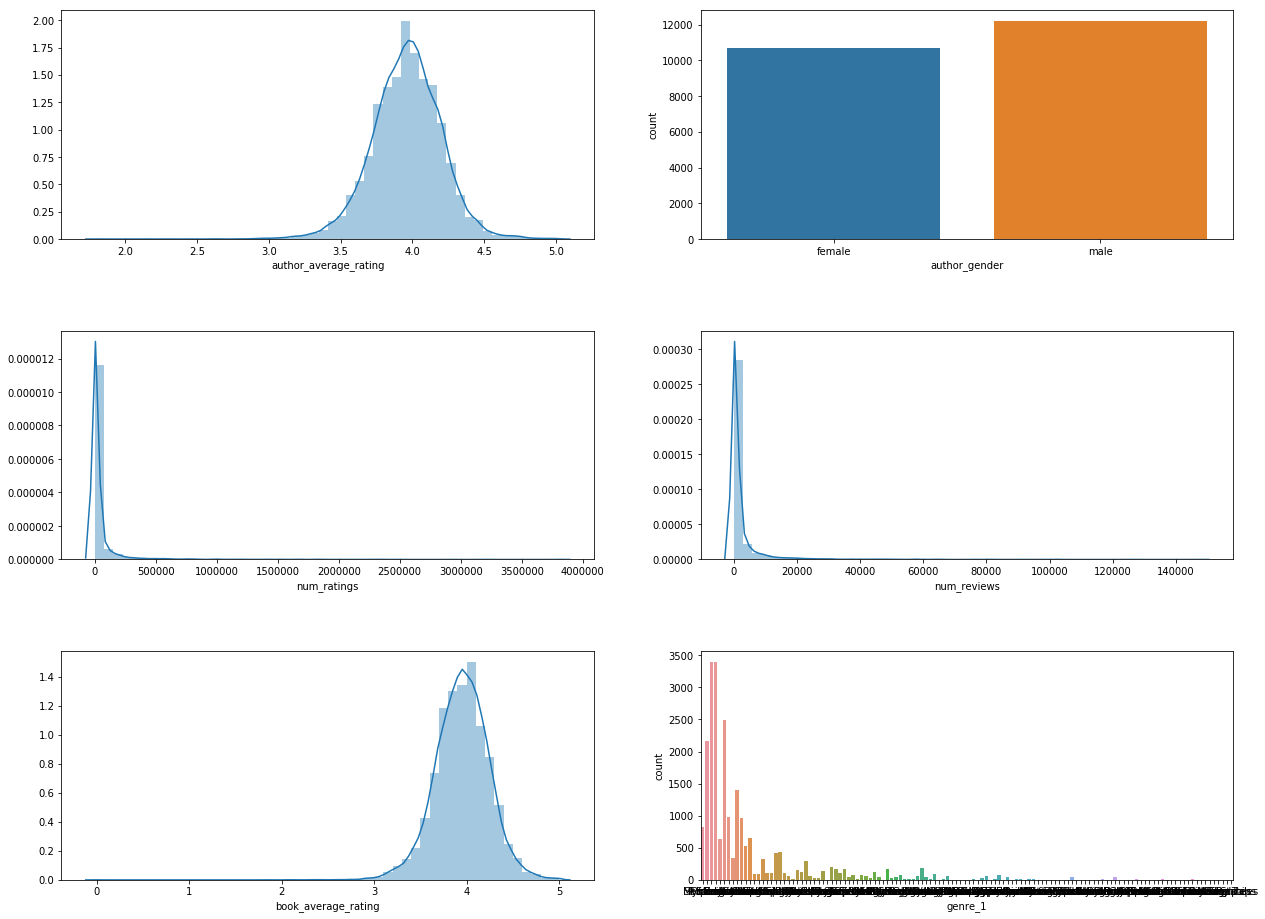

In [3]:
plt.rcParams["figure.figsize"] = (21,16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.subplot(3, 2, 1)
sns.distplot(df1.author_average_rating)

plt.subplot(3, 2, 2)
sns.countplot(df1.author_gender)

plt.subplot(3, 2, 3)
sns.distplot(df1.num_ratings)

plt.subplot(3, 2, 4)
sns.distplot(df1.num_reviews)

plt.subplot(3, 2, 5)
sns.distplot(df1.book_average_rating)

plt.subplot(3, 2, 6)
sns.countplot(df1.genre_1)

In [4]:
df1.corr()

,author_average_rating,author_id,author_rating_count,author_review_count,book_average_rating,num_ratings,num_reviews,score
author_average_rating,1.000000,0.138877,0.088789,0.101794,0.812692,0.059084,0.060119,0.036805
author_id,0.138877,1.000000,-0.153104,-0.160505,0.095845,-0.148608,-0.130321,-0.069451
author_rating_count,0.088789,-0.153104,1.000000,0.897665,0.086174,0.566012,0.483974,0.120106
author_review_count,0.101794,-0.160505,0.897665,1.000000,0.094685,0.517670,0.598060,0.133991
book_average_rating,0.812692,0.095845,0.086174,0.094685,1.000000,0.066445,0.066591,0.037207
num_ratings,0.059084,-0.148608,0.566012,0.517670,0.066445,1.000000,0.828945,0.183423
num_reviews,0.060119,-0.130321,0.483974,0.598060,0.066591,0.828945,1.000000,0.190998
score,0.036805,-0.069451,0.120106,0.133991,0.037207,0.183423,0.190998,1.000000


In [65]:
df1.author_id

0          74489
1         706255
2        5618190
3          37871
4          36122
          ...   
22886     108007
22887    7063660
22888    6543639
22889    5246010
22890    5266193
Name: author_id, Length: 22891, dtype: int64

In [5]:
genre1 = df1.genre_1.value_counts().reset_index()
genre2 = df1.genre_2.value_counts().reset_index()

In [6]:

df1['book_title'] = df1['book_title'].str.strip()
#str.strip() 

In [154]:
import seaborn as sns
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

#df1 = pd.read_csv("good_reads_final.csv")

In [9]:
# Data Cleansing

## get rid of '\n' in the title
df1 = df1.replace(r'\n','', regex=True)
## get rid of space in the title
df1['book_title'] = df1['book_title'].str.strip()

## Build a Dummy Column for the categorical column:'Genre'
genre1 = df1.genre_1.value_counts().reset_index()
popular_genre1 = [i for i in genre1['index'].head(40)]
df1['genre_1'] = df1.genre_1.apply(lambda x: x if x in popular_genre1 else 'other')


## Add the dummy columns to the dataset
df2 = df1[['book_title','author_average_rating','num_ratings','num_reviews','book_average_rating','genre_1']]
df3 = pd.get_dummies(df2, columns=['genre_1'], drop_first=True)



# Normalization
df3['num_ratings'] = (df3['num_ratings']-df3['num_ratings'].min())/(df3['num_ratings'].max()-df3['num_ratings'].min())
df3['num_reviews'] = (df3['num_reviews']-df3['num_reviews'].min())/(df3['num_reviews'].max()-df3['num_reviews'].min())
df3['author_average_rating'] = (df3['author_average_rating']-df3['author_average_rating'].min())/(df3['author_average_rating'].max()-df3['author_average_rating'].min())
df3['book_average_rating'] = (df3['book_average_rating']-df3['book_average_rating'].min())/(df3['book_average_rating'].max()-df3['book_average_rating'].min())



# Make pivot table for easier calculation 
df4 = df3.pivot_table(columns='book_title')

In [10]:
def recommend_book_list(bookname):
    """
    input: name of the book(str)
    output: ordered df of 10 books that are similar to the input
    """
    book_trait = df4[bookname]
    book_like_bookname = df4.corrwith(book_trait)

    ordered_list = pd.DataFrame(book_like_bookname, columns=['Correlation'])
    ordered_list.dropna(inplace=True)
    #corr_temp.head()
    output_df = ordered_list.sort_values('Correlation', ascending=False).head(10)
    return output_df

# Rec Sys Built

In [153]:
df1 = df1.replace(r'\n','', regex=True)

genre1 = df1.genre_1.value_counts().reset_index()
popular_genre1 = [i for i in genre1['index'].head(40)]


In [126]:
df2 = df1.copy()
df2 = df2[['book_title','author_average_rating','num_ratings','num_reviews','book_average_rating','genre_1','genre_2']]
df2.head()

,book_title,author_average_rating,num_ratings,num_reviews,book_average_rating,genre_1,genre_2
0,Murder on St. Mark's Place,4.01,5260,375,4.02,Mystery,Historical
1,The Girl with the Dragon Tattoo,4.15,2229163,65227,4.13,Fiction,Mystery
2,Tailored for Trouble,4.00,2151,391,3.99,Romance,Contemporary
3,The Obscene Bird of Night,3.88,1844,173,4.14,Fiction,Magical Realism
4,Sorcery & Cecelia: or The Enchanted Choc...,4.10,17051,1890,4.01,Fantasy,Young Adult


In [128]:
df2['genre_1'] = df2.genre_1.apply(lambda x: x if x in popular_genre1 else 'other')
df2['genre_2'] = df2.genre_2.apply(lambda x: x if x in popular_genre2 else 'other')


In [129]:
df3 = pd.get_dummies(df2, columns=['genre_1'], drop_first=True)
#data_df = pd.get_dummies(data,columns=['vehicleType'],drop_first=True)
df3 = df3.drop(columns=['genre_2'])
df3

,book_title,author_average_rating,num_ratings,num_reviews,book_average_rating,genre_1_Autobiography,genre_1_Biography,genre_1_Business,genre_1_Childrens,genre_1_Christian,...,genre_1_Science,genre_1_Science Fiction,genre_1_Self Help,genre_1_Sequential Art,genre_1_Short Stories,genre_1_Thriller,genre_1_Travel,genre_1_Womens Fiction,genre_1_Young Adult,genre_1_other
0,Murder on St. Mark's Place,4.01,5260,375,4.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Girl with the Dragon Tattoo,4.15,2229163,65227,4.13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tailored for Trouble,4.00,2151,391,3.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Obscene Bird of Night,3.88,1844,173,4.14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sorcery & Cecelia: or The Enchanted Choc...,4.10,17051,1890,4.01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22886,Gotta Have Faith,3.94,430,33,3.82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22887,Payton's Pursuit,4.29,82,57,4.56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22888,My Viking Vampire,4.00,2698,375,3.73,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22889,The Trinity,4.20,356,38,3.89,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
#Normalization

df3['num_ratings'] = (df3['num_ratings']-df3['num_ratings'].min())/(df3['num_ratings'].max()-df3['num_ratings'].min())
df3['num_reviews'] = (df3['num_reviews']-df3['num_reviews'].min())/(df3['num_reviews'].max()-df3['num_reviews'].min())
df3['author_average_rating'] = (df3['author_average_rating']-df3['author_average_rating'].min())/(df3['author_average_rating'].max()-df3['author_average_rating'].min())
df3['book_average_rating'] = (df3['book_average_rating']-df3['book_average_rating'].min())/(df3['book_average_rating'].max()-df3['book_average_rating'].min())

df3

,book_title,author_average_rating,num_ratings,num_reviews,book_average_rating,genre_1_Autobiography,genre_1_Biography,genre_1_Business,genre_1_Childrens,genre_1_Christian,...,genre_1_Science,genre_1_Science Fiction,genre_1_Self Help,genre_1_Sequential Art,genre_1_Short Stories,genre_1_Thriller,genre_1_Travel,genre_1_Womens Fiction,genre_1_Young Adult,genre_1_other
0,Murder on St. Mark's Place,0.688679,0.001377,0.002539,0.804,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Girl with the Dragon Tattoo,0.732704,0.583410,0.441630,0.826,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tailored for Trouble,0.685535,0.000563,0.002647,0.798,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Obscene Bird of Night,0.647799,0.000483,0.001171,0.828,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sorcery & Cecelia: or The Enchanted Choc...,0.716981,0.004463,0.012797,0.802,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22886,Gotta Have Faith,0.666667,0.000113,0.000223,0.764,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22887,Payton's Pursuit,0.776730,0.000021,0.000386,0.912,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22888,My Viking Vampire,0.685535,0.000706,0.002539,0.746,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22889,The Trinity,0.748428,0.000093,0.000257,0.778,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df3['book_title'] = df3['book_title'].str.strip()

df4 = df3.pivot_table(columns='book_title')
df4

book_title,"""Why Are All The Black Kids Sitting Together in the Cafeteria?"": A Psychologist Explains the Development of Racial Identity",#1 Muse,#16thingsithoughtweretrue,#Bae,#famous,& Sons,'Til Death Do Us Part,'Til Death: Volume One,'Tis Pity She's a Whore,'Tis the Season for Seduction,...,マギ 1,ラストゲーム 1,ワンパンマン 1 [Wanpanman 1],不器用なサイレント [Bukiyou na Silent],日々蝶々 1,暁のヨナ 1 [Akatsuki no Yona 1],純潔ドロップ [Junketsu Drop],裸足でバラを踏め [Hadashi de Bara wo Fume] 1,赤髪の白雪姫 1 [Akagami no Shirayukihime 1],"走得越远,离自己越近 The Farther I Walk, The Closer I Get To Me"
author_average_rating,0.735849,0.729560,0.632075,0.732704,0.544025,0.487421,0.654088,0.716981,0.581761,0.767296,...,0.767296,0.783019,0.830189,0.735849,0.688679,0.842767,0.603774,0.735849,0.795597,0.842767
book_average_rating,0.834000,0.824000,0.752000,0.886000,0.708000,0.672000,0.760000,0.812000,0.736000,0.928000,...,0.846000,0.870000,0.896000,0.840000,0.814000,0.886000,0.784000,0.812000,0.866000,0.876000
genre_1_Autobiography,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Biography,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Business,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Childrens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Christian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Christian Fiction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Classics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Contemporary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [149]:
df4.to_csv('pivot_book.csv', encoding='utf-8', index=False)

In [143]:
temp = df4['1984']
book_like_temp = df4.corrwith(temp)

corr_temp = pd.DataFrame(book_like_temp, columns=['Correlation'])
corr_temp.dropna(inplace=True)
#corr_temp.head()
first_list = corr_temp.sort_values('Correlation', ascending=False).head(10)


,Correlation
book_title,
1984,1.000000
Pride and Prejudice,0.999932
The Catcher in the Rye,0.998888
Animal Farm,0.998279
The Great Gatsby,0.992452
Lord of the Flies,0.990498
Of Mice and Men,0.987094
To Kill a Mockingbird,0.982793
Fahrenheit 451,0.981778


In [147]:
temp1 = df4['The Great Gatsby']
book_like_temp1 = df4.corrwith(temp1)

corr_temp1 = pd.DataFrame(book_like_temp1, columns=['Correlation'])
corr_temp1.dropna(inplace=True)
#corr_temp.head()
second_list = corr_temp1.sort_values('Correlation', ascending=False).head(10)


,Correlation
book_title,
The Great Gatsby,1.000000
To Kill a Mockingbird,0.995161
The Catcher in the Rye,0.992830
1984,0.992452
Pride and Prejudice,0.991658
Animal Farm,0.987851
Lord of the Flies,0.976189
Of Mice and Men,0.965956
Fahrenheit 451,0.953114


In [146]:
temp2 = df4['Kafka on the Shore']
book_like_temp2 = df4.corrwith(temp2)

corr_temp2 = pd.DataFrame(book_like_temp2, columns=['Correlation'])
corr_temp2.dropna(inplace=True)
#corr_temp.head()
third_list = corr_temp2.sort_values('Correlation', ascending=False).head(10)

,Correlation
book_title,
Kafka on the Shore,1.000000
كافكا على الشاطئ,1.000000
The Secret History,0.999982
Cloud Atlas,0.999832
The Wind-Up Bird Chronicle,0.999736
The Forgotten Garden,0.999716
Defending Jacob,0.999715
العمى,0.999684
Blindness,0.999684


In [17]:
def recommend_book_list(bookname):
    """
    input: name of the book(str)
    output: ordered df of 10 books that are similar to the input
    """
    book_trait = df4[bookname]
    book_like_bookname = df4.corrwith(book_trait)

    ordered_list = pd.DataFrame(book_like_bookname, columns=['Correlation'])
    ordered_list.dropna(inplace=True)
    #corr_temp.head()
    output_df = ordered_list.sort_values('Correlation', ascending=False)[1:11]
    return output_df.reset_index()
    

In [18]:
recommend_book_list('Dance Dance Dance')

,book_title,Correlation
0,The Secret of the Nagas,0.999988
1,"Ahab's Wife, or The Star-Gazer",0.999988
2,My Side of the Mountain,0.999979
3,"Tinker, Tailor, Soldier, Spy",0.999976
4,The Space Between Us,0.999974
5,The Spy Who Came In from the Cold,0.999965
6,شيطنات الطفلة الخبيثة,0.999963
7,Einstein's Dreams,0.999961
8,How to Walk Away,0.999959
9,The Cellist of Sarajevo,0.999957


In [12]:
a = recommend_book_list('Dance Dance Dance')

In [14]:
a.columns

Index(['Correlation'], dtype='object')

In [15]:
a.reset_index()

,book_title,Correlation
0,Dance Dance Dance,1.000000
1,The Secret of the Nagas,0.999988
2,"Ahab's Wife, or The Star-Gazer",0.999988
3,My Side of the Mountain,0.999979
4,"Tinker, Tailor, Soldier, Spy",0.999976
5,The Space Between Us,0.999974
6,The Spy Who Came In from the Cold,0.999965
7,شيطنات الطفلة الخبيثة,0.999963
8,Einstein's Dreams,0.999961
9,How to Walk Away,0.999959


In [16]:
df4

book_title,"""Why Are All The Black Kids Sitting Together in the Cafeteria?"": A Psychologist Explains the Development of Racial Identity",#1 Muse,#16thingsithoughtweretrue,#Bae,#famous,& Sons,'Til Death Do Us Part,'Til Death: Volume One,'Tis Pity She's a Whore,'Tis the Season for Seduction,...,マギ 1,ラストゲーム 1,ワンパンマン 1 [Wanpanman 1],不器用なサイレント [Bukiyou na Silent],日々蝶々 1,暁のヨナ 1 [Akatsuki no Yona 1],純潔ドロップ [Junketsu Drop],裸足でバラを踏め [Hadashi de Bara wo Fume] 1,赤髪の白雪姫 1 [Akagami no Shirayukihime 1],"走得越远,离自己越近 The Farther I Walk, The Closer I Get To Me"
author_average_rating,0.735849,0.729560,0.632075,0.732704,0.544025,0.487421,0.654088,0.716981,0.581761,0.767296,...,0.767296,0.783019,0.830189,0.735849,0.688679,0.842767,0.603774,0.735849,0.795597,0.842767
book_average_rating,0.834000,0.824000,0.752000,0.886000,0.708000,0.672000,0.760000,0.812000,0.736000,0.928000,...,0.846000,0.870000,0.896000,0.840000,0.814000,0.886000,0.784000,0.812000,0.866000,0.876000
genre_1_Autobiography,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Biography,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Business,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Childrens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Christian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Christian Fiction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Classics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
genre_1_Contemporary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
df3

,book_title,author_average_rating,num_ratings,num_reviews,book_average_rating,genre_1_Autobiography,genre_1_Biography,genre_1_Business,genre_1_Childrens,genre_1_Christian,...,genre_1_Science,genre_1_Science Fiction,genre_1_Self Help,genre_1_Sequential Art,genre_1_Short Stories,genre_1_Thriller,genre_1_Travel,genre_1_Womens Fiction,genre_1_Young Adult,genre_1_other
0,Murder on St. Mark's Place,0.688679,0.001377,0.002539,0.804,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Girl with the Dragon Tattoo,0.732704,0.583410,0.441630,0.826,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tailored for Trouble,0.685535,0.000563,0.002647,0.798,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Obscene Bird of Night,0.647799,0.000483,0.001171,0.828,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sorcery & Cecelia: or The Enchanted Chocolate Pot,0.716981,0.004463,0.012797,0.802,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22886,Gotta Have Faith,0.666667,0.000113,0.000223,0.764,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22887,Payton's Pursuit,0.776730,0.000021,0.000386,0.912,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22888,My Viking Vampire,0.685535,0.000706,0.002539,0.746,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22889,The Trinity,0.748428,0.000093,0.000257,0.778,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
import random
random.seed(42)
subset = random.sample(range(0, 22891), 40)
subset

[20952,
 3648,
 819,
 9012,
 8024,
 7314,
 4572,
 3358,
 22174,
 17870,
 2848,
 19349,
 13825,
 1041,
 976,
 3070,
 7164,
 7623,
 16559,
 19726,
 869,
 18390,
 6515,
 21295,
 17856,
 13746,
 7223,
 14719,
 19309,
 9115,
 212,
 5231,
 22876,
 13848,
 11149,
 9105,
 5094,
 7055,
 11029,
 3349]

In [72]:
avg_cor = []
book_list= []

for i in subset:
    a = recommend_book_list(df3.loc[i][0])
    for j in range(10):
        book_list.append(a['book_title'][j])
    avg_cor.append(a['Correlation'].mean())
    

book_list

["The Crown's Game",
 'Far Far Away',
 'The Wicked Deep',
 'Everless',
 'Little, Big',
 'The Witch Hunter',
 "The Strange Case of the Alchemist's Daughter",
 'Entwined',
 'Vessel',
 'Bewitching',
 'Before Life Happened',
 'For Real',
 'Landry Park',
 'Shooting Stars',
 'Pretty Sly',
 'Pretty Crooked',
 'Kiss the Morning Star',
 'The Murmurings',
 'Popular',
 'The Mark',
 'Sacred Clowns',
 "Mother Teresa's Advice for Jilted Lovers",
 "Monk's Hood",
 'Dance Hall of the Dead',
 'Under Locker and Key',
 'A Thief of Time',
 'Sanctuary',
 'The Lady in the Lake',
 'Clouds of Witness',
 "Murder on St. Mark's Place",
 'Mephisto',
 "The Contortionist's Handbook",
 'The Dig',
 'Hush Little Baby',
 'Monkey Beach',
 'The Feathered Bone',
 'Shoeless Joe',
 'The Snake Pit',
 'The Stories of Eva Luna',
 'So Big',
 "Mr. Darcy's Daughters",
 'Habits of the House',
 'Enchantments',
 'The Secrets of Lizzie Borden',
 'Sultana',
 "All the King's Ladies",
 "The Raven's Bride",
 'Charity Girl',
 'The Last Boo

Text(0.5,1,'Average Correlation for 10 recommended books')

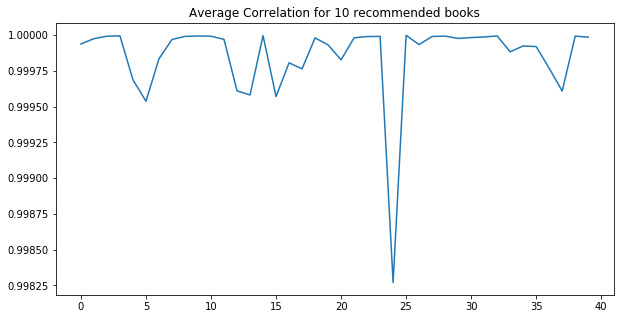

In [73]:
plt.rcParams["figure.figsize"] = [10, 5]


plt.plot(avg_cor)
#plt.figsize(figsize=(10,10))
plt.title("Average Correlation for 10 recommended books")

In [74]:
import collections
print([item for item, count in collections.Counter(book_list).items() if count > 1])

['Kafka on the Shore', 'كافكا على الشاطئ']


In [84]:
len(set([x for x in book_list if book_list.count(x) == 1]))

396/400

0.99

In [60]:
def unfold(lst):
    output = []
    def _unfold(i):
        if isinstance(i, list) or isinstance(i, tuple):
            [_unfold(j) for j in i]
        else:
            output.append(i)
    _unfold(lst)
    return output

unfold(book_list)


[0          Finger Lickin' Fifteen
 1                    Maisie Dobbs
 2              The Maltese Falcon
 3    The Thousand-Dollar Tan Line
 4       Crocodile on the Sandbank
 5                   The Big Sleep
 6                 Force of Nature
 7                      Hold Tight
 8      The Beekeeper's Apprentice
 9                       Heartsick
 Name: book_title, dtype: object, 0                 Tell a Thousand Lies
 1                       The Jade Peony
 2               The Baker's Apprentice
 3                 Chasing Sylvia Beach
 4                             The Mare
 5          Some Are Sicker Than Others
 6          The Girl Who Slept with God
 7    Laughing Boy: A Navajo Love Story
 8                       The Ginger Man
 9                    The Blazing World
 Name: book_title, dtype: object, 0                                 Storm Damages
 1                             Beneath the Scars
 2               The Duke with the Dragon Tattoo
 3                                   

In [61]:
book_list

[0          Finger Lickin' Fifteen
 1                    Maisie Dobbs
 2              The Maltese Falcon
 3    The Thousand-Dollar Tan Line
 4       Crocodile on the Sandbank
 5                   The Big Sleep
 6                 Force of Nature
 7                      Hold Tight
 8      The Beekeeper's Apprentice
 9                       Heartsick
 Name: book_title, dtype: object, 0                 Tell a Thousand Lies
 1                       The Jade Peony
 2               The Baker's Apprentice
 3                 Chasing Sylvia Beach
 4                             The Mare
 5          Some Are Sicker Than Others
 6          The Girl Who Slept with God
 7    Laughing Boy: A Navajo Love Story
 8                       The Ginger Man
 9                    The Blazing World
 Name: book_title, dtype: object, 0                                 Storm Damages
 1                             Beneath the Scars
 2               The Duke with the Dragon Tattoo
 3                                   

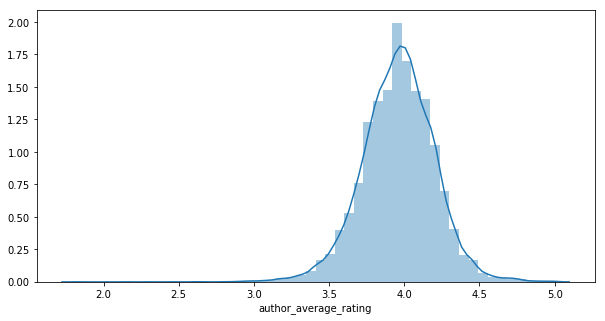

In [85]:
sns.distplot(df1.author_average_rating)

In [98]:
tmp1 = df1.sort_values(['num_ratings'], ascending=False).head(50)

In [99]:
tmp1

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
13802,4.22,female,"literature-fiction,",1825,Harper Lee,/author/show/1825.Harper_Lee,4027504,108465,United States,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,To Kill a Mockingbird,Classics,Fiction,3820921,81131,284,July 11th 1960,3918
11862,4.22,female,"literature-fiction,",1825,Harper Lee,/author/show/1825.Harper_Lee,4025899,108409,United States,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,To Kill a Mockingbird,Classics,Fiction,3819552,81102,324,July 11th 1960,17311
6498,4.22,female,"literature-fiction,",1825,Harper Lee,/author/show/1825.Harper_Lee,4025899,108409,United States,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,To Kill a Mockingbird,Classics,Fiction,3819418,81096,323,July 11th 1960,4272
3042,4.22,female,"literature-fiction,",1825,Harper Lee,/author/show/1825.Harper_Lee,4025433,108392,United States,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,To Kill a Mockingbird,Classics,Fiction,3819020,81079,324,July 11th 1960,19367
797,4.22,female,"literature-fiction,",1825,Harper Lee,/author/show/1825.Harper_Lee,4024620,108376,United States,4.27,https://www.goodreads.com/book/show/2657.To_Ki...,2657,To Kill a Mockingbird,Classics,Fiction,3818591,81069,324,July 11th 1960,77418
14067,3.89,male,"fiction,short-stories,",3190,F. Scott Fitzgerald,/author/show/3190.F_Scott_Fitzgerald,3528773,77212,United States,3.91,https://www.goodreads.com/book/show/4671.The_G...,4671,The Great Gatsby,Classics,Fiction,3204359,57872,180,1925,1237
11051,3.89,male,"fiction,short-stories,",3190,F. Scott Fitzgerald,/author/show/3190.F_Scott_Fitzgerald,3527472,77174,United States,3.91,https://www.goodreads.com/book/show/4671.The_G...,4671,The Great Gatsby,Classics,Fiction,3203635,57848,180,1925,2020
6699,3.89,male,"fiction,short-stories,",3190,F. Scott Fitzgerald,/author/show/3190.F_Scott_Fitzgerald,3527472,77174,United States,3.91,https://www.goodreads.com/book/show/4671.The_G...,4671,The Great Gatsby,Classics,Fiction,3203463,57844,180,1925,4119
3952,3.89,male,"fiction,short-stories,",3190,F. Scott Fitzgerald,/author/show/3190.F_Scott_Fitzgerald,3527472,77174,United States,3.91,https://www.goodreads.com/book/show/4671.The_G...,4671,The Great Gatsby,Classics,Fiction,3203286,57839,180,1925,19842
796,3.89,male,"fiction,short-stories,",3190,F. Scott Fitzgerald,/author/show/3190.F_Scott_Fitzgerald,3527100,77166,United States,3.91,https://www.goodreads.com/book/show/4671.The_G...,4671,The Great Gatsby,Classics,Fiction,3202899,57834,180,1925,32216


ValueError: num must be 1 <= num <= 1, not 2

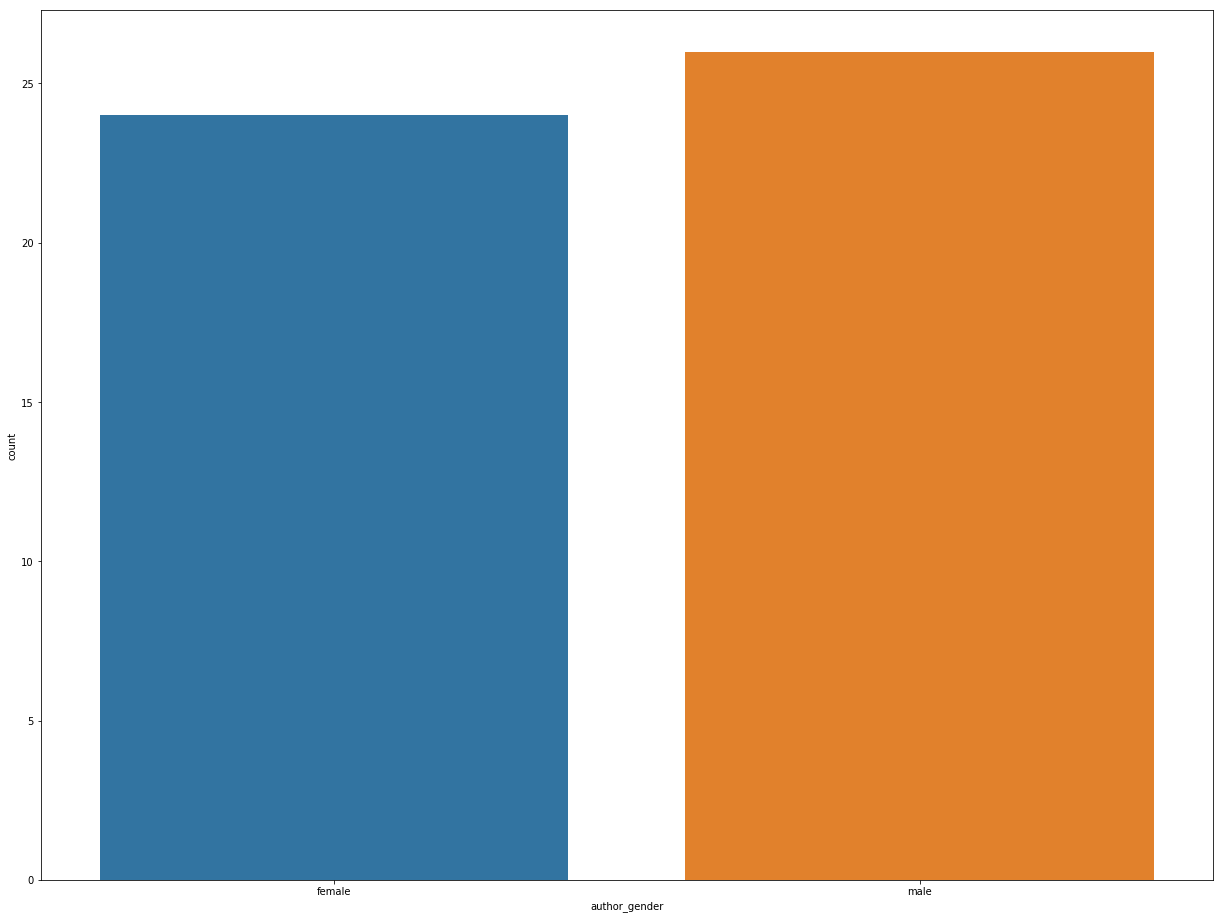

In [104]:
plt.rcParams["figure.figsize"] = (21,16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.subplot(1, 1, 1)
sns.countplot(tmp1.author_gender)

plt.subplot(1, 1, 2)
sns.countplot(df1.author_gender)


In [111]:
plt.rcParams["figure.figsize"] = [10, 5]

x = tmp1.author_gender
percentage = lambda i: len(i) / float(len(x)) * 100

ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")
plt.show()

#sns.countplot(tmp1.author_gender)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

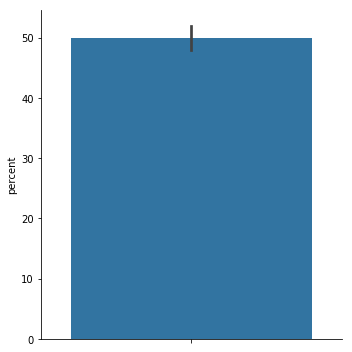

In [110]:
y =  'author_gender'

(tmp1
[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), y='percent',kind='bar'))